In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# load data
data_set_path = "../data/wdbc.data"

titles = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]

head_set = ['patient_ID', 'diagnosis']

standards = ["_mean", "_SD", "_mean_of_largest"]
for standard in standards:
    for title in titles:
        head_set.append(title + standard)
    

df = pd.read_csv(data_set_path, names=head_set, sep=",")

# replacing M with 1 and B with 0
df['diagnosis'] = df['diagnosis'].replace(['M'], 1)
df['diagnosis'] = df['diagnosis'].replace(['B'], 0)

# choosing the first 30 malignant cases and the first 50 benigh cases in the data set as the test set and the remaining as the training set
test_set_with_classes = df[df.diagnosis == 1][:30].append(df[df.diagnosis == 0][:50])
test_set = test_set_with_classes.drop(columns="patient_ID").drop(columns="diagnosis")


training_set_with_classes = df[df.diagnosis == 1][30:].append(df[df.diagnosis == 0][50:])
training_set = training_set_with_classes.drop(columns="patient_ID").drop(columns="diagnosis")
training_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_mean_of_largest,texture_mean_of_largest,perimeter_mean_of_largest,area_mean_of_largest,smoothness_mean_of_largest,compactness_mean_of_largest,concavity_mean_of_largest,concave_points_mean_of_largest,symmetry_mean_of_largest,fractal_dimension_mean_of_largest
33,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,24.150,30.90,161.40,1813.0,0.15090,0.65900,0.60910,0.17850,0.3672,0.11230
34,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,20.210,27.26,132.70,1261.0,0.14460,0.58040,0.52740,0.18640,0.4270,0.12330
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,20.010,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,15.890,30.36,116.20,799.6,0.14460,0.42380,0.51860,0.14470,0.3591,0.10140
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


 1 c) 
 i. Depict scatter plots of the features in your training set in a scatter matrix.
(See p. 129 of the textbook).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3b3ee310>,
      dtype=object)

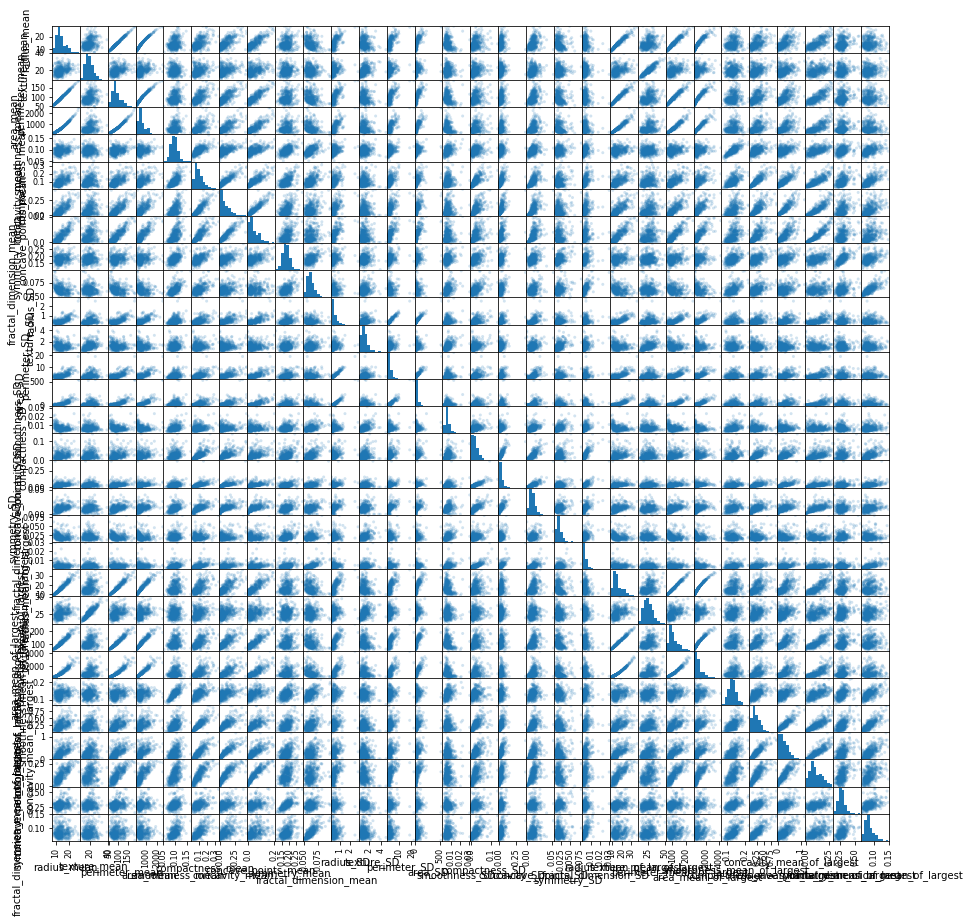

In [73]:
pd.plotting.scatter_matrix(training_set, alpha=0.2, figsize=(15, 15))


1 c) ii. Use logistic regression4 to solve the binary classification problem. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets.

training set:

         Current function value: 0.004992
         Iterations: 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  489
Model:                          Logit   Df Residuals:                      458
Method:                           MLE   Df Model:                           30
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                  0.9924
Time:                        18:21:06   Log-Likelihood:                -2.4409
converged:                      False   LL-Null:                       -322.79
Covariance Type:            nonrobust   LLR p-value:                1.072e-115
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -288.1076    530.485     -0.543      0.587   -1327.839     751.624
x1          -202.2827    176.047     -1.149      0.251    -547.32

/Users/luoshuaiqing/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


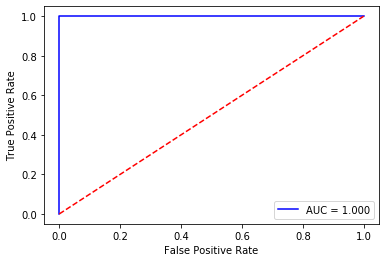

1.0
1.0
1.0
1.0


In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scikitplot as skplt
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


y = training_set_with_classes.iloc[:, 1].values.reshape(-1, 1)
x = training_set.values.reshape(-1,30)
x = sm.add_constant(x)

logfit = sm.Logit(y, x).fit(maxiter = 11)

print(logfit.summary())

# confusion matrix
print(logfit.pred_table())


# ROC curve
y_true = training_set_with_classes.iloc[:, 1]
y_probas = logfit.predict(x)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = logfit.predict(x)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# precision
precision = tp/(tp+fp)
print(precision)

# recall
recall = tp / (tp + fn)
print(recall)

# f1
f1 = 2 * ((precision * recall) / (precision + recall))
print(f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print(auc)








for test_set

[[47  3]
 [ 2 28]]


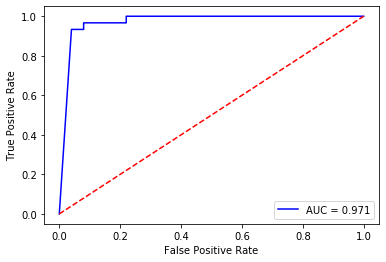

0.9032258064516129
0.9333333333333333
0.9180327868852459
0.9713333333333334


In [94]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = test_set_with_classes.iloc[:, 1]
x = test_set.values.reshape(-1,30)
x = sm.add_constant(x)

y_pred = logfit.predict(x)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print(confusionMatrix)



# ROC curve
y_true = test_set_with_classes.iloc[:, 1]
y_probas = logfit.predict(x)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)



1. c. iii) for training set

p-values:
 [0.58705949 0.25054611 0.07187204 0.41597314 0.16078354 0.13089094
 0.0475986  0.90264651 0.05202433 0.14362134 0.16431745 0.87797721
 0.92187035 0.93002158 0.62243873 0.58626398 0.04936334 0.19062823
 0.51370696 0.06145126 0.06988993 0.10626788 0.74161529 0.26529757
 0.20959342 0.69312981 0.08935105 0.257205   0.33420734 0.06043652
 0.24323175]


good indexes:
 [5, 15]
Optimization terminated successfully.
         Current function value: 0.674504
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  489
Model:                          Logit   Df Residuals:                      487
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                -0.02180
Time:                        18:41:08   Log-Likelihood:                -329.83
converged:                       True   

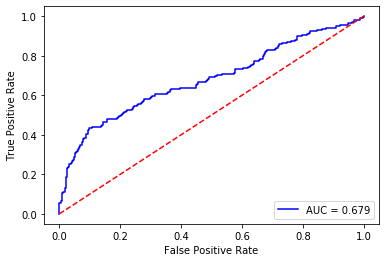

precision: 0.4148606811145511
recall: 0.7362637362637363
f1: 0.5306930693069307
auc: 0.5603142785553209


In [95]:
# p-values:
p_values = logfit.pvalues
print("p-values:\n", p_values)

good_indexes = []
for index in range(len(p_values)):
    if p_values[index] < 0.05:
        good_indexes.append(index - 1)
        
        
print("\n\ngood indexes:\n",good_indexes)
y = training_set_with_classes.iloc[:, 1].values.reshape(-1, 1)
x = training_set.iloc[:,[5,15]].values.reshape(-1,2)

logfit = sm.Logit(y, x).fit(maxiter = 11)

print(logfit.summary())

# confusion matrix
print(logfit.pred_table())


# ROC curve
y_true = training_set_with_classes.iloc[:, 1]
y_probas = logfit.predict(x)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


y_pred = y_probas
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()



# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)







for test set

[[18 32]
 [ 8 22]]


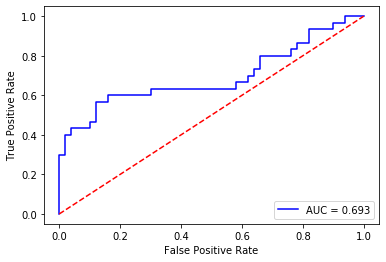

precision: 0.4074074074074074
recall: 0.7333333333333333
f1: 0.5238095238095238
auc: 0.6933333333333334


In [96]:
# confusion matrix
y_true = test_set_with_classes.iloc[:, 1]
x = test_set.iloc[:,[5,15]].values.reshape(-1,2)

y_pred = logfit.predict(x)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_true = test_set_with_classes.iloc[:, 1]
y_probas = logfit.predict(x)
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)

1. c) iv.

Yes, because our classes did not converge.

2 b.Select the first 130 non-recurrent cases and the first 37 recurrent cases as your training set. Add record #197 in the data set to your training set as well.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# load data
data_set_path = "../data/wpbc.data"

titles = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]

head_set = ['patient_ID', 'classes', "time"]

standards = ["_mean", "_SD", "_mean_of_largest"]
for standard in standards:
    for title in titles:
        head_set.append(title + standard)
    
head_set.append("tumor_size")
head_set.append("Lymph_node_status")

df = pd.read_csv(data_set_path, names=head_set, sep=",")

# replacing R with 1 and N with 0
df['classes'] = df['classes'].replace(['R'], 1)
df['classes'] = df['classes'].replace(['N'], 0)





training_set_with_classes = df[df.classes == 1][:37].append(df[df.classes == 0][:130]).append(df.iloc[196])
training_set = training_set_with_classes.drop(columns="patient_ID").drop(columns="classes").drop(columns="time")

df2 = df.iloc[:196].append(df.iloc[-1])
test_set_with_classes =  df2[df2.classes == 1][37:].append(df2[df2.classes == 0][130:])
test_set = test_set_with_classes.drop(columns="patient_ID").drop(columns="classes").drop(columns="time")


2. c)

In [98]:
training_set = training_set.replace('?', np.NaN)
# print(training_set.isnull().sum())
median = training_set['Lymph_node_status'].median(axis = 0, skipna = True) 
print(median)
training_set['Lymph_node_status'] = training_set['Lymph_node_status'].replace([np.NaN], median)



1.0


2. d) i. for training set

[[98 32]
 [20 18]]


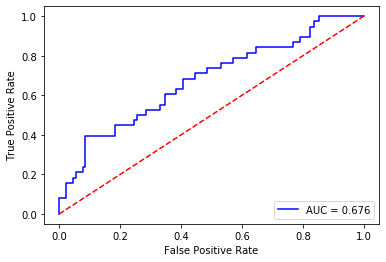

precision: 0.36
recall: 0.47368421052631576
f1: 0.40909090909090906
auc: 0.6757085020242914
accuracy score: 0.6904761904761905


In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y = training_set_with_classes.iloc[:, 1].values.reshape(-1, 1).ravel()

x = training_set.values.reshape(-1, 32)
gnb = gnb.fit(x, y)

y_pred = gnb.predict(x)
# print(y_pred)


# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y


confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_probas = gnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))

for test set

[[14  7]
 [ 6  3]]


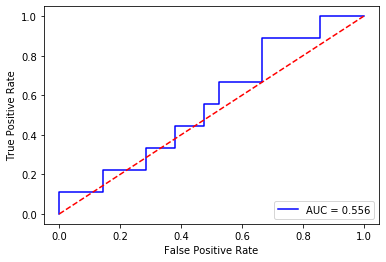

precision: 0.3
recall: 0.3333333333333333
f1: 0.3157894736842105
auc: 0.5555555555555556
accuracy score: 0.5666666666666667


In [100]:
y = test_set_with_classes.iloc[:, 1].values.reshape(-1, 1).ravel()

x = test_set.values.reshape(-1, 32)
# gnb = gnb.fit(x, y)

y_pred = gnb.predict(x)
# print(y_pred)


# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y

confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_probas = gnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))

2. d. ii) for training_set

0    130
1     38
Name: classes, dtype: int64
1    90
0    90
dtype: int64
[[58 32]
 [33 57]]


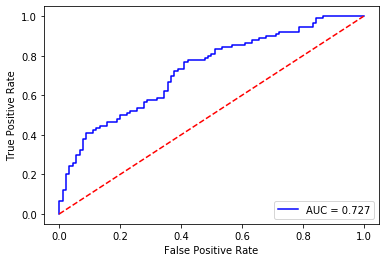

precision: 0.6404494382022472
recall: 0.6333333333333333
f1: 0.6368715083798883
auc: 0.7269135802469135
accuracy score: 0.6388888888888888


In [101]:
print(training_set_with_classes['classes'].value_counts())

training_set_class_1 = training_set_with_classes[training_set_with_classes.classes == 1]
training_set_class_0 = training_set_with_classes[training_set_with_classes.classes == 0]

training_set_with_classes_2 = training_set_class_0.sample(n=90, random_state=23).append(training_set_class_1)
training_set_2 = training_set_with_classes_2.drop(columns="patient_ID").drop(columns="classes").drop(columns="time")
training_set_2 = training_set_2.replace('?', 1)


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 13)
y = training_set_with_classes_2.iloc[:, 1].values.reshape(-1, 1).ravel()
x = training_set_2.values.reshape(-1, 32)

x_train_new, y_train_new = sm.fit_sample(x, y.ravel())


print(pd.Series(y_train_new).value_counts())



from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y = y_train_new.ravel()

x = x_train_new
gnb = gnb.fit(x, y)

y_pred = gnb.predict(x)
# print(y_pred)


# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y


confusionMatrix = confusion_matrix(y_true, y_pred)
print(confusionMatrix)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()


# ROC curve
y_probas = gnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))

for test set

[[14  7]
 [ 5  4]]


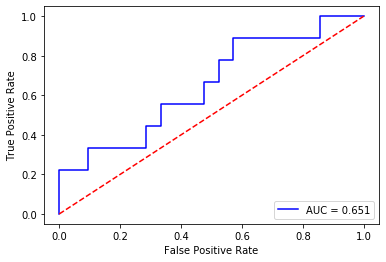

precision: 0.36363636363636365
recall: 0.4444444444444444
f1: 0.39999999999999997
auc: 0.6507936507936508
accuracy score: 0.6


In [102]:
y = test_set_with_classes.iloc[:, 1].values.reshape(-1, 1).ravel()

x = test_set.values.reshape(-1, 32)

y_pred = gnb.predict(x)


# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y

confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_probas = gnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))

Smote does some help on the prediction of my data, since the f1 score for my training set and test set increases.

2 d. iii 

[[99 31]
 [22 16]]


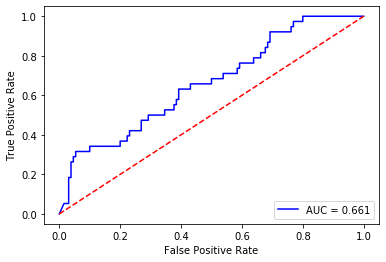

precision: 0.3404255319148936
recall: 0.42105263157894735
f1: 0.3764705882352941
auc: 0.6609311740890689
accuracy score: 0.6845238095238095


In [103]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y = training_set_with_classes.iloc[:, 1].values.reshape(-1, 1).ravel()

x = training_set.values.reshape(-1, 32)
mnb = mnb.fit(x, y)

y_pred = mnb.predict(x)
# print(y_pred)


# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y


confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_probas = mnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))

[[16  5]
 [ 6  3]]


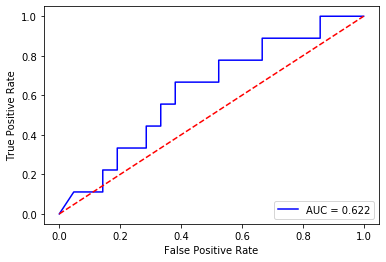

precision: 0.375
recall: 0.3333333333333333
f1: 0.35294117647058826
auc: 0.6216931216931216
accuracy score: 0.6333333333333333


In [104]:
# for test set 
y = test_set_with_classes.iloc[:, 1].values.reshape(-1, 1).ravel()

x = test_set.values.reshape(-1, 32)


y_pred = mnb.predict(x)



# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y

confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_probas = mnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()






# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))

0    130
1     38
Name: classes, dtype: int64
1    90
0    90
dtype: int64
[[63 27]
 [41 49]]


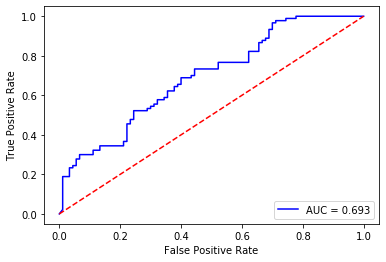

precision: 0.6447368421052632
recall: 0.5444444444444444
f1: 0.5903614457831324
auc: 0.6934567901234567
accuracy score: 0.6222222222222222


In [105]:
# for training set
print(training_set_with_classes['classes'].value_counts())

training_set_class_1 = training_set_with_classes[training_set_with_classes.classes == 1]
training_set_class_0 = training_set_with_classes[training_set_with_classes.classes == 0]

training_set_with_classes_2 = training_set_class_0.sample(n=90, random_state=23).append(training_set_class_1)
training_set_2 = training_set_with_classes_2.drop(columns="patient_ID").drop(columns="classes").drop(columns="time")
training_set_2 = training_set_2.replace('?', 1)


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 13)
y = training_set_with_classes_2.iloc[:, 1].values.reshape(-1, 1).ravel()
x = training_set_2.values.reshape(-1, 32)

x_train_new, y_train_new = sm.fit_sample(x, y.ravel())


print(pd.Series(y_train_new).value_counts())



from sklearn.naive_bayes import GaussianNB
mnb = MultinomialNB()
y = y_train_new.ravel()

x = x_train_new
mnb = mnb.fit(x, y)

y_pred = mnb.predict(x)
# print(y_pred)


# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y


confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_probas = mnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))

[[15  6]
 [ 4  5]]


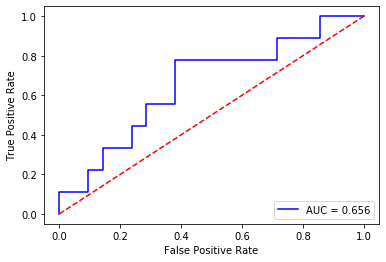

precision: 0.45454545454545453
recall: 0.5555555555555556
f1: 0.5
auc: 0.656084656084656
accuracy score: 0.6666666666666666


In [106]:
# for test set
y = test_set_with_classes.iloc[:, 1].values.reshape(-1, 1).ravel()

x = test_set.values.reshape(-1, 32)

y_pred = mnb.predict(x)


# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = y

confusionMatrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(confusionMatrix)



# ROC curve
y_probas = mnb.predict_proba(x)
y_probas = y_probas[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





# precision
precision = tp/(tp+fp)
print("precision:", precision)

# recall
recall = tp / (tp + fn)
print("recall:", recall)

# f1
f1 = 2.0 * ((precision * recall) / (precision + recall))
print("f1:", f1)

# AUC
auc = metrics.roc_auc_score(y_true, y_probas)
print("auc:", auc)


from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_true, y_pred, normalize = True))